# Project description

**Selecting a location for a well**

As an employee of the mining company **GlavRosGosNeft** you are tasked with identifying the most suitable location for a new oil well.

You have access to oil samples from three different regions, each containing `10,000` oil fields where the quality and quantity of oil reserves have been assessed. Your objective is to develop a machine learning model that can assist in determining the region that will yield the highest profits. In addition, you need to utilize the *Bootstrap* technique to analyze potential profits and risks.

The following are the necessary steps to choose the optimal location:

- Conduct a search for oil deposits within the selected region and gather data on the relevant features.
- Create a model that estimates the volume of reserves.
- Select deposits that have the highest estimated values, taking into consideration the company's budget and the cost of drilling each well.
- Total the profit from the selected deposits to determine the final profitability of the project.

Task conditions:
- Only `linear regression` is suitable for modeling (others are not predictable enough).
- `500` locations are surveyed in the region, and `200` of the best are selected for development using machine learning.
- The budget for well development in the region is `10 billion` rubles.
- At current market prices, one barrel of raw material generates a revenue of `450` rubles. The revenue from each unit of product is `450,000` rubles, as the volume is measured in thousands of barrels.
- After assessing the risks, only those regions with a probability of losses below `2.5%` should be considered. The region with the highest average profit among them should be chosen.

# Table of contents

---

1. [Data](#data)
    * [Exploratory data analysis](#data-eda)
    * [Datasets and features](#data-features)
2. [Training the model](#training-the-model)
3. [Preparing for profit calculation](#preparing-for-profit-calculation)
4. [Profit and risk calculation](#profit-and-risk-calculation)
5. [Conclusion](#conclusion)
---

## Data <a class="anchor" id="data"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Locating the CSV with several locations
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except FileNotFoundError:
    try:
        df_0 = pd.read_csv('geo_data_0.csv')
        df_1 = pd.read_csv('geo_data_1.csv')
        df_2 = pd.read_csv('geo_data_2.csv')
    except FileNotFoundError:
        try: 
            df_0 = pd.read_csv(r'geo_data_0.csv')
            df_1 = pd.read_csv(r'geo_data_1.csv')
            df_2 = pd.read_csv(r'geo_data_2.csv')
        except FileNotFoundError:
            print('File not found')

# Ignoring all warnings and displaying all columns in the DF
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# Iterates through each dataframe using a 'for loop'
# The enumerate function is used to get the index of each dataframe
dataframes = [df_0, df_1, df_2]

for i, df in enumerate(dataframes):
    print(f"Shape of dataframe {i}: {df.shape}")
    print(f"-" * 26)
    print(f"Missing values: \n")
    print(df.isna().mean().sort_values())
    print(f"-" * 26)
    print(f"Duplicates: \n")
    print(df.duplicated().sum())
    print(f"-" * 26)
    print(f"Data types: \n")
    print(df.dtypes)
    print(f"-" * 26)
    print(df.describe())
    display(df.head())
    print(f"\n")

Shape of dataframe 0: (100000, 5)
--------------------------
Missing values: 

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
--------------------------
Duplicates: 

0
--------------------------
Data types: 

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
--------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647




Shape of dataframe 1: (100000, 5)
--------------------------
Missing values: 

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
--------------------------
Duplicates: 

0
--------------------------
Data types: 

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
--------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305




Shape of dataframe 2: (100000, 5)
--------------------------
Missing values: 

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
--------------------------
Duplicates: 

0
--------------------------
Data types: 

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
--------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Exploratory data analysis <a class="anchor" id="data-eda"></a>

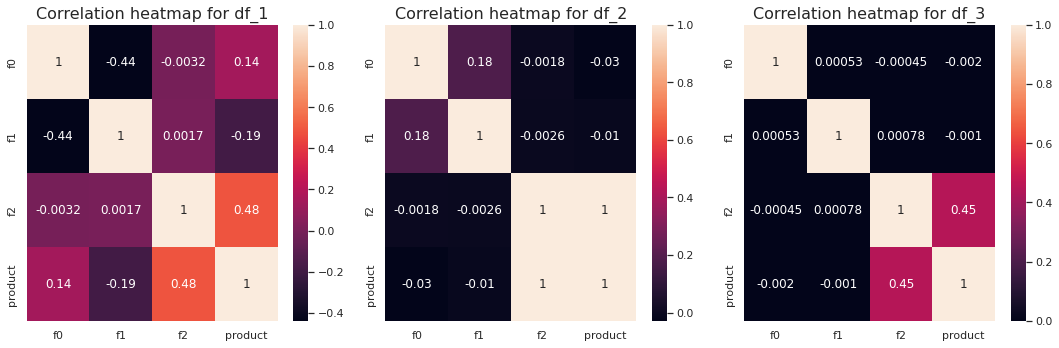

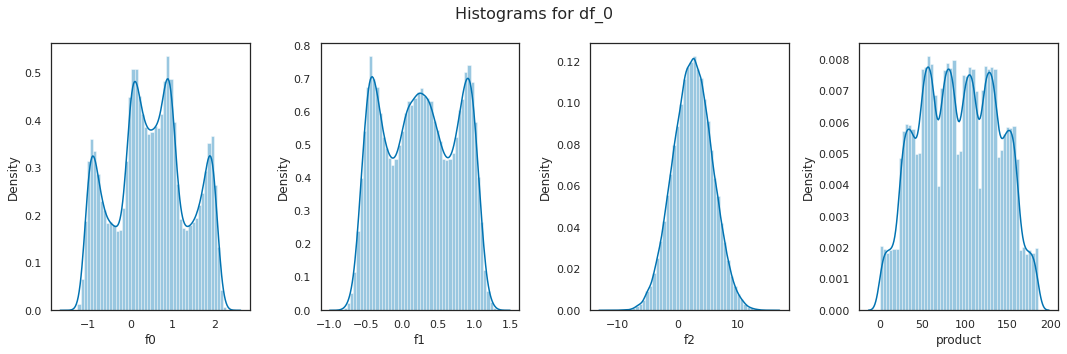

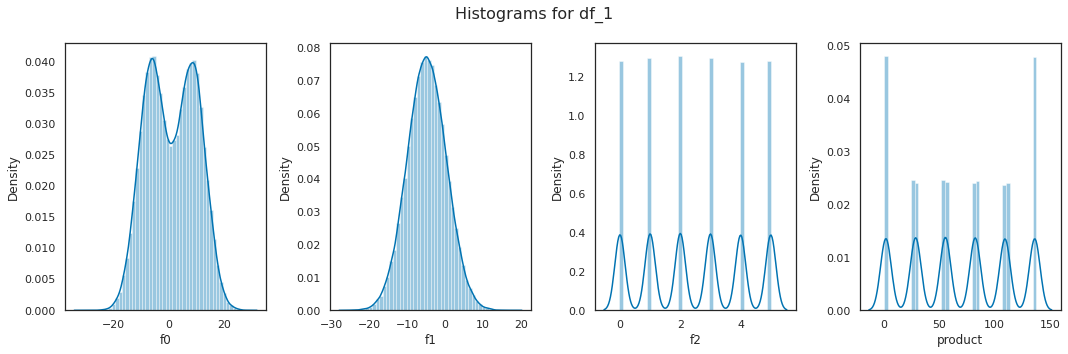

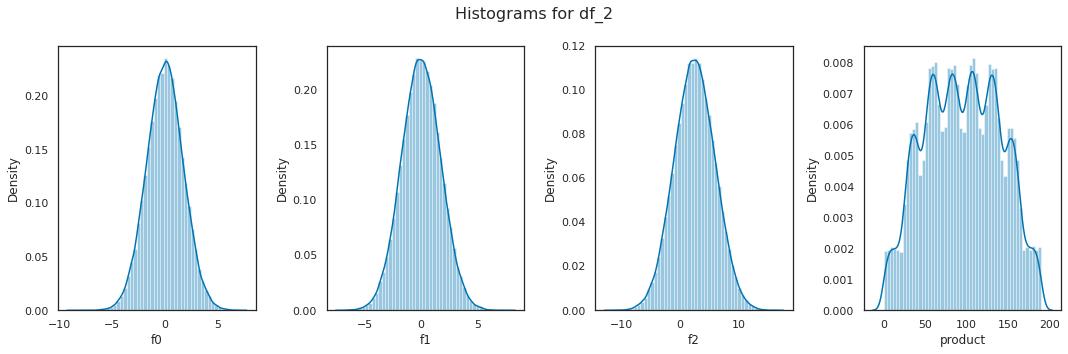

In [4]:
# Seaborn style
sns.set(style='white', palette='colorblind')

# Heatmaps
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Loop through each dataframe and create correlation heatmaps
for i, df in enumerate([df_0, df_1, df_2]):
    sns.heatmap(df.corr(), cbar=True, annot=True, ax=axs[i])
    axs[i].set_title(f"Correlation heatmap for df_{i+1}", fontsize=16)

plt.tight_layout()
plt.show()

# Histograms
dfs = [df_0, df_1, df_2]

# Loop through each dataframe and create a subplot with 4 histograms
for i, df in enumerate(dfs):
    fig, axs = plt.subplots(ncols=4, figsize=(15, 5))
    sns.distplot(df['f0'], ax=axs[0])
    sns.distplot(df['f1'], ax=axs[1])
    sns.distplot(df['f2'], ax=axs[2])
    sns.distplot(df['product'], ax=axs[3])
    plt.suptitle(f"Histograms for df_{i}", fontsize=16)
    plt.tight_layout()
    plt.show()


Correlation:
- Region number two `df_1`: there is a complete correlation between the feature `f2` and the volume of reserves in the well `product`.
- The first (df_0) and third (df_2) regions look approximately the same.

Data distribution:
- From the distribution, it is noticeable that the first `df_0` and third `df_2` regions have a similar distribution in the volumes of reserves in the well. The data is distributed normally across the `f*` features.

### Datasets and features <a class="anchor" id="data-features"></a>

The `id` is not needed here and could be removed from following work. The target feature in the task is the data in the `product` column, it is necessary to prepare the features and the target feature.

In [5]:
# Dropping unnecessary data
df_0 = df_0.drop('id', axis=1)
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)

# Target and features for each region
target_0 = df_0['product']
features_0 = df_0.drop('product', axis=1)
target_1 = df_1['product']
features_1 = df_1.drop('product', axis=1)
target_2 = df_2['product']
features_2 = df_2.drop('product', axis=1)

The dataset will be split into training and validation sets in a 75:25 ratio.

In [6]:
# Datasets for each region
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=8080
)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=8080
)
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=8080
)

# Print proportions of each set
data_sets = {'Training': X_train_0,
             'Validation': X_valid_0
}
total_size = df_0.shape[0]

print(f"Total size: {total_size}")

for name, data in data_sets.items():
    prop = data.shape[0] / total_size
    print(f"{name} set proportion: {prop:.0%}")

Total size: 100000
Training set proportion: 75%
Validation set proportion: 25%


## Training the model <a class="anchor" id="training-the-model"></a>

It is known from the conditions that only one `LinearRegression` model will be suitable for training, and it is necessary to train it for each region, calculate the average predicted oil reserves, and the root mean square error - `RMSE`.

In [7]:
# Predictions for each region
predictions_0 = []
predictions_1 = []
predictions_2 = []

datasets = [(X_train_0, X_valid_0, y_train_0, y_valid_0, target_0),
            (X_train_1, X_valid_1, y_train_1, y_valid_1, target_1),
            (X_train_2, X_valid_2, y_train_2, y_valid_2, target_2)]
            
# In each iteration, the loop unpacks the tuple into
# separate variables, fits the model, and calculates the RMSE.
# Then stores the predictions for each region
# in the corresponding list using conditional statements
for i, data in enumerate(datasets):
    X_train, X_valid, y_train, y_valid, target = data
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, predictions) ** 0.5
    
    if i == 0:
        predictions_0 = predictions
    elif i == 1:
        predictions_1 = predictions
    else:
        predictions_2 = predictions

    print(f"Results for region: {i}")
    print(f"Average predicted oil reserves: {target.mean().round(2)}")
    print(f"RMSE: {rmse.round(4)} \n")

Results for region: 0
Average predicted oil reserves: 92.5
RMSE: 37.8558 

Results for region: 1
Average predicted oil reserves: 68.83
RMSE: 0.8897 

Results for region: 2
Average predicted oil reserves: 95.0
RMSE: 39.7775 



## Preparing for profit calculation <a class="anchor" id="preparing-for-profit-calculation"></a>

According to the task conditions, there are inputs that need to be saved as constants. The sufficient volume of raw materials for a new oil well will be calculated using the formula:
`Development budget ÷ Best location in the region ÷ Income from each unit of product`

For comparison, all data from all regions will be printed out.

In [8]:
BARREL = 450 * 1000 # Barrel price * 1000 = Income from each unit of product
BUDGET = 10000000000 # Development budget
LOCATION = 200 # Best locations in the region
RES_LOCATION = 500 # Researched locations

budget_per_location = BUDGET / LOCATION
production_volume = BUDGET / LOCATION / BARREL

print(f"The sufficient amount of resources for a new well to break even {production_volume:.2f}")
print(f"The average volume of resources in the first region: {target_0.mean().round(2)}")
print(f"The average volume of resources in the second region: {target_1.mean().round(2)}")
print(f"The average volume of resources in the first region: {target_2.mean().round(2)}")

The sufficient amount of resources for a new well to break even 111.11
The average volume of resources in the first region: 92.5
The average volume of resources in the second region: 68.83
The average volume of resources in the first region: 95.0


## Profit and risk calculation <a class="anchor" id="profit-and-risk-calculation"></a>

In [9]:
# Convert predictions to series
predictions_0 = pd.Series(predictions_0)
predictions_1 = pd.Series(predictions_1)
predictions_2 = pd.Series(predictions_2)

# Profit calculation function:
def revenue(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target.loc[predictions_sorted.index.to_list()][:count]
    return BARREL * selected.sum() - BUDGET

In [10]:
# Bootstrap with 1000 samples:
def bootstrap(target_test, predict):
    state = np.random.RandomState(8080)
    values = []
    target = target_test.reset_index(drop=True)
    predictions = pd.Series(predict)
    count = 0 
    for i in range(1000):
        target_subsample = target.sample(500, replace=True, random_state=state)
        predictions_subsample = predictions.loc[target_subsample.index.to_list()]
        value = revenue(target_subsample, predictions_subsample, LOCATION)
        values.append(value)
        if value < 0: 
            count += 1 
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = count / 1000

    print(f"Average profit: {values.mean().round(2)}; risk: {round(risk*100, 2)}%")
    print(f"Confidence interval: lower {lower.round(2)} upper {upper.round(2)}")
    
print(f"\n First region:")
values_0 = bootstrap(y_valid_0, predictions_0)
print(f"\n Second region:")
values_1 = bootstrap(y_valid_1, predictions_1)
print(f"\n Third region:")
values_2 = bootstrap(y_valid_2, predictions_2)


 First region:
Average profit: 395449817.55; risk: 6.2%
Confidence interval: lower -82629442.68 upper 928457974.18

 Second region:
Average profit: 517695776.61; risk: 0.7%
Confidence interval: lower 100986999.23 upper 940053418.44

 Third region:
Average profit: 429177032.25; risk: 5.9%
Confidence interval: lower -125293013.12 upper 990763931.3


## Conclusion <a class="anchor" id="conclusion"></a>

The data provided for the project was analyzed, prepared, and split for model training.

1. Data correlation:
    - Second region. There is a perfect correlation between the feature `f2` and the volume of reserves in the well product.
    - The first and third regions appear to be approximately the same.

2. Data distribution:
    - It is noticeable that the first and third regions have a similar distribution in the volumes of reserves in the well. The data is distributed normally across the features.

3. The data was split into training and validation datasets in a 3:1 ratio.

4. To make predictions, the `LinearRegression` model was trained, and the evaluation metric used was `RMSE`. The following results were obtained:

| Region | Average predicted oil reserves | RMSE |
|--|--|--|
| 1 | 92.5 | 37.8558 |
| 2 | 68.83 | 0.8897 |
| 3 | 95.0 | 39.7775 |

5. To calculate revenue, was used the formula:
`Development budget` ÷ `Best location in the region` ÷ `Income from each unit of product`, and calculations were performed for the three regions, with the following results:
    - The sufficient amount of resources for a new well to break even 111.11
    - The average volume of resources in the first region: 92.5
    - The average volume of resources in the second region: 68.83
    - The average volume of resources in the first region: 95.0

6. Finally, a function was created to calculate the confidence interval, potential risks, and average profit for each of the regions. The results are as follows:

| Region | Average profit | Risk | Confidence interval (lower) | Confidence interval (upper) |
|--|--|--|--|--|
| 1 | 395449817.55 | 6.2% | -82629442.68 | 928457974.18 |
| 2 | 517695776.61 | 0.7% | 100986999.23 | 940053418.44 |
| 3 | 429177032.25 | 5.9% | -125293013.12 | 990763931.3 |